<a href="https://colab.research.google.com/github/Strikersid07/Projects/blob/main/corporate_credit_rating_forecasting_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corporate Credit Rating Forecasting



### Introduction

This notebook contains the results of the data analysis performed on a set of corporate credit ratings given by ratings agencies to a set of companies. The aim of the data analysis is to build a machine learning model from the rating data that can be used to predict the rating a company will receive.

The first section of the notebook shows the exploratory data analysis (EDA) performed to explore and understand the data. It looks at each attribute (variable) in the data to understand the nature and distribution of the attribute values. It also examines the correlation between the variables through visual analysis. A summary at the end highlights the key findings of the EDA.

The second section shows the development of a Deep learning model.A Sequential model is selected. Subsequently,we do hyperparameter tunning and compare the before and after results of the model.

In the model evaluation step we use different techniques such as a confusion matrix and scores as F1, Precision and Recall to understand different aspects of the performance of the model. We also perform feature selection to know what financial indicators are more relevant for the rating agencies.

#Students name Student No.
##1. KHARB Shantnu - ETU20230074
##2. VERMA Ish - ETU20232180
##3. SHARMA Siddharth - ETU20230076
##4. BHARDWAJ Sanjay - ETU20232122
##5. MISHRA Gourav - ETU20221420

### The Dataset

There are 30 features for every company of which 25 are financial indicators.
They can be divided in: <br>
- **Liquidity Measurement Ratios**: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding
- **Profitability Indicator Ratios**: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed
- **Debt Ratios**: debtRatio, debtEquityRatio
- **Operating Performance Ratios**: assetTurnover
- **Cash Flow Indicator Ratios**: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio


### Libraries used:
- pandas
- numpy
- matplotlib
- seaborn
- random
- sklearn
- xgboost
- wordcloud

Load the Libraries used in the notebook

In [ ]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS
from random import sample
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

#### Ignore Warnings

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### Import Dataset

In [ ]:
df_rating = pd.read_csv('/content/corporate_rating.csv')

## Exploratory Data Analysis

Our first step is to perform an exploratory data analysis to understand the charateristics of dataset. Here are some quesitons we will try to adress:

- What are the dimensions of the data?
- How do predictors relate to each other?
- What are the classes of the data?
- How are the predictors distributed?
- How are the labels distributed?
- Do we have missing values?
- Are outliers are relevant?
- Are there any transformations that must be done with the dataset?

In [ ]:
# Display the dimensions
print("The credit rating dataset has", df_rating.shape[0], "records, each with", df_rating.shape[1],
    "attributes")

The credit rating dataset has 2029 records, each with 31 attributes


We will now use the function `.info()` to see the classes of columns and search missing values.  

In [ ]:
# Display the structure
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

We have 26 columns of numerical data and 6 descriptive columns (one of which is the label).There are no missing values.
<br> A first look at the data:

In [ ]:
df_rating.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


### Analyse Labels

As we know we are working with ordinal labels. That means there is a scale from more secure to less secure ratings. For instance, the triple-A (AAA) is the most secure rating a company can receive. On the other hand, the rating D is the less secure. It means the company will likely default on its creditors. Let's have a first look at the how many reatings we have of each in the dataset.


In [ ]:
df_rating.Rating.value_counts()

Rating
BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: count, dtype: int64

We observe that the dataset is very unbalanced. We have 671 triple-Bs (BBB) but only 1 D. However, we are working with Ratings from different companies such as `Moody's`, `Standard & Poor's` and more. We will classify our labels according to the grading risk and not the rate.

| Bond Rating |                   |          |            |              |
|-------------|-------------------|----------|------------|--------------|
| Moody's     | Standard & Poor's | Fitch    | Grade      | Risk         |
| Aaa         | AAA               | AAA      | Investment | Lowest Risk  |
| Aa          | AA                | AA       | Investment | Low Risk     |
| A           | A                 | A        | Investment | Low Risk     |
| Baa         | BBB               | BBB      | Investment | Medium Risk  |
| Ba, B       | BB, B             | BB, B    | Junk       | High Risk    |
| Caa/Ca      | CCC/CC/C          | CCC/CC/C | Junk       | Highest Risk |
| C           | D                 | D        | Junk       | In Default   |


To do it we will replace with a dictonary each of this ratings.

#visualisation

In [ ]:
rating_dict = {'AAA':'Lowest Risk',
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk',
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk',
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}
df_rating.Rating = df_rating.Rating.map(rating_dict)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
colors = ['#ff0000', '#ff6600', '#ffff00', '#66ff66', '#33cc33', '#009900']  # Red to Green colors

# Create a custom colormap using LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)
num_ratings = len(df_rating['Rating'].unique())

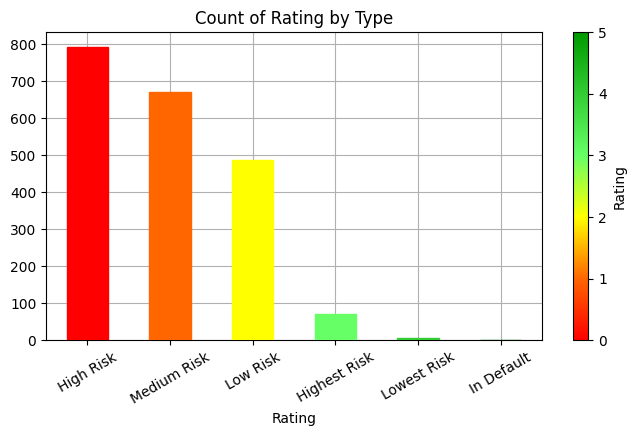

In [ ]:
ax = df_rating['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True,
                                             colormap=custom_cmap,
                                             zorder=3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
for i, rect in enumerate(ax.patches):
    rect.set_color(custom_cmap(i / (num_ratings - 1)))

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=0, vmax=num_ratings-1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Rating')

plt.show()

Unfortunately, given the lack of Credit Ratings classified as `Lowest Risk` and `In Default` we will have to eliminate then from the table. However, the dataset will keep unbalanced and if needed we will have to adress this issue in further steps.

In [ ]:
df_rating = df_rating[df_rating['Rating']!='Lowest Risk'] # filter Lowest Risk
df_rating = df_rating[df_rating['Rating']!='In Default']  # filter In Default
df_rating.reset_index(inplace = True, drop=True) # reset index

### Descriptive Statistics

Now we will use statistical tools, especially from pandas to improve the understanding from the dataset, especially the numerical features. We have seen there are 25 numerical columns in the dataset, all of each are financial indicators from the companies. The function `describe()` returns information about the distribution of the data such as `quantiles`, `min` and `max`.

In [ ]:
# Statistical summary
df_rating[['currentRatio','netProfitMargin',"debtRatio",'assetTurnover','operatingCashFlowPerShare']].describe()

,currentRatio,netProfitMargin,debtRatio,assetTurnover,operatingCashFlowPerShare
count,2021.000000,2021.000000,2021.000000,2.021000e+03,2.021000e+03
mean,3.535411,0.278725,0.661811,3.692898e+03,6.540891e+03
std,44.139386,6.076128,0.208890,9.584305e+04,1.778797e+05
min,-0.932005,-101.845815,0.000000,-9.157477e+00,-1.195049e+04
25%,1.071930,0.020894,0.536158,3.870528e-01,2.348851e+00
50%,1.492804,0.064323,0.641434,7.012402e-01,4.361649e+00
75%,2.160710,0.113871,0.749998,1.098948e+00,7.322553e+00
max,1725.505005,198.517873,1.927839,2.553149e+06,6.439270e+06


#Correlation Matrix

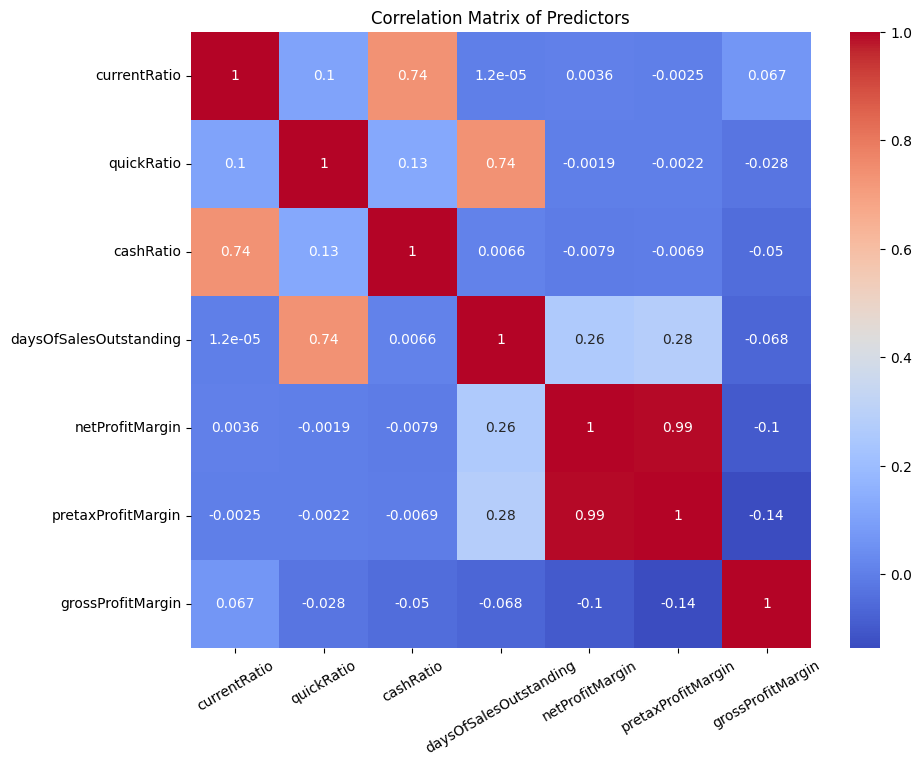

In [ ]:
# Selecting the subset of variables for correlation analysis
Correlation_variables = ['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
                      'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin']

# Subsetting the DataFrame with selected variables
Correlation_data = df_rating[Correlation_variables]

corr_matrix = Correlation_data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Predictors')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)
plt.show()

In [ ]:
df_rating = df_rating.drop("pretaxProfitMargin", axis=1)


### Skewness and Outliers

We observe a lot of skewness in the data with this first exploration. In this case, it means that most variables in the dataset may strong presence of outliers. Taking as observation the table above the first column:

- `currentRatio`: This 50% of its variables between `1.071` and `2.166891`. The minimum value is `-0.932005` however the maximum value is `1725.505005`. It means, in other words, there is a giant outlier that is extremely distant from most points from the data (currentRatio).

The same pattern can be observed in the following columns such as `quickRatio`,	`cashRatio`, `daysOfSalesOutstanding`, `netProfitMargin` and so on.

To observe how this reflect on the distribution of the data lets make some plots of variables chose randomly.

In [ ]:
column_list = list(df_rating.columns[6:31])
column_list = sample(column_list,4)
print(column_list)

['cashRatio', 'debtRatio', 'returnOnCapitalEmployed', 'netProfitMargin']


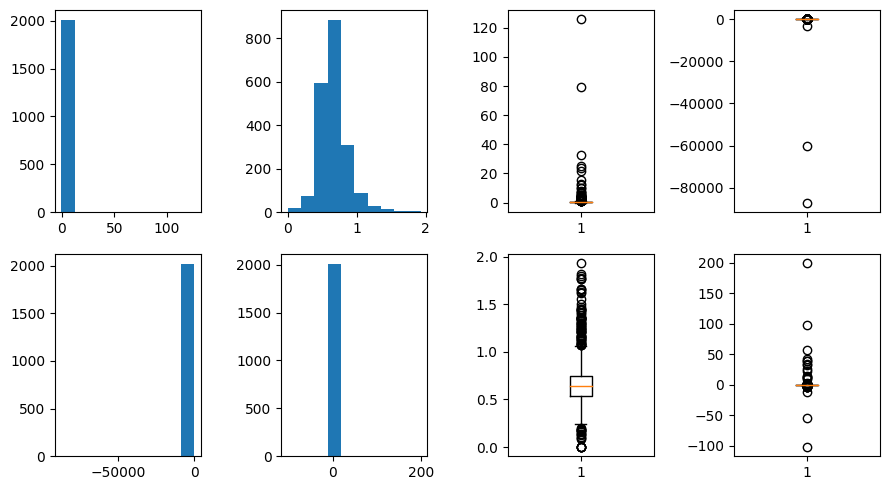

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df_rating[column_list[0]])
axes[0, 1].hist(df_rating[column_list[1]])
axes[1, 0].hist(df_rating[column_list[2]])
axes[1, 1].hist(df_rating[column_list[3]])

axes[0, 2].boxplot(df_rating[column_list[0]])
axes[1, 2].boxplot(df_rating[column_list[1]])
axes[0, 3].boxplot(df_rating[column_list[2]])
axes[1, 3].boxplot(df_rating[column_list[3]])

figure.tight_layout()

As predicted, the data is comtaminated by outliers. We canot observe real behaviour of the distribution because some points differ too much from the others. We will use the function `.skew` from pandas in all columns. It should return between 0 and 1 if a column is normally distributed.

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
numeric_columns = df_rating.select_dtypes(include=['number'])

skewness_per_column = numeric_columns.skew()

print("Skewness of each numeric column:")
print(skewness_per_column)

Skewness of each numeric column:
currentRatio                          34.271115
quickRatio                            30.864610
cashRatio                             27.046952
daysOfSalesOutstanding                20.359098
netProfitMargin                       17.585073
grossProfitMargin                    -14.198688
operatingProfitMargin                 26.441502
returnOnAssets                       -32.049111
returnOnCapitalEmployed              -33.252701
returnOnEquity                        31.639845
assetTurnover                         25.968848
fixedAssetTurnover                    26.068762
debtEquityRatio                        0.268074
debtRatio                              1.284256
effectiveTaxRate                      32.265705
freeCashFlowOperatingCashFlowRatio   -22.868222
freeCashFlowPerShare                  33.610677
cashPerShare                          33.958646
companyEquityMultiplier                0.268175
ebitPerRevenue                        22.055668
enterpr

We observe this is a generalized problem. As we can see almost all columns are extremely skewed. We will now go deeper in the investigation of outliers. The following code will return the proportion of outliers in each column . The definition of outlier will be the one from the boxplot - above or bellow `1.5 x IQR`.

In [ ]:
for c in df_rating.columns[6:31]:

    q1 = df_rating[c].quantile(0.25)
    q3 = df_rating[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    lower_out = len(df_rating.loc[(df_rating[c] < fence_low)  ,c])
    upper_out = len(df_rating.loc[(df_rating[c] > fence_high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(df_rating)
    print(c, ": "+"{:.2%}".format(prop_out))


currentRatio : 18.01%
quickRatio : 19.05%
cashRatio : 14.84%
daysOfSalesOutstanding : 23.55%
netProfitMargin : 25.09%
grossProfitMargin : 0.99%
operatingProfitMargin : 22.12%
returnOnAssets : 24.25%
returnOnCapitalEmployed : 22.07%
returnOnEquity : 28.70%
assetTurnover : 15.83%
fixedAssetTurnover : 13.46%
debtEquityRatio : 22.07%
debtRatio : 21.33%
effectiveTaxRate : 28.06%
freeCashFlowOperatingCashFlowRatio : 16.92%
freeCashFlowPerShare : 23.55%
cashPerShare : 17.12%
companyEquityMultiplier : 22.02%
ebitPerRevenue : 24.34%
enterpriseValueMultiple : 23.70%
operatingCashFlowPerShare : 17.66%
operatingCashFlowSalesRatio : 16.87%
payablesTurnover : 14.45%


Most columns have a significant number of outliers. However it is not clear for us if there are a few rows that all outliers or each of the rows may be contributing individually with some outliers. We will now check by row the distribution of outliers. We will create a new dataframe that `df_rating_outlier` that will be used with this purpose. In this dataframe every cell will 1 one if the corresponding cell is an outlier in `df_raint` and 0 if it is not.

In [ ]:
df_rating_outlier = df_rating.copy()

for c in df_rating_outlier.columns[6:31]:

    q1 = df_rating_outlier[c].quantile(0.25)
    q3 = df_rating_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr

    for i in range(len(df_rating_outlier)):

        if df_rating.loc[i,c] < fence_low or df_rating.loc[i,c] > fence_high: # if Outlier

            df_rating_outlier.loc[i,c] = 1

        else: # Not Outlier
            df_rating_outlier.loc[i,c] = 0

In [ ]:
df_rating_outlier.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,Low Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Medium Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Medium Risk,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Now we will be able to count how many outliers each row has and plot it.

<Axes: >

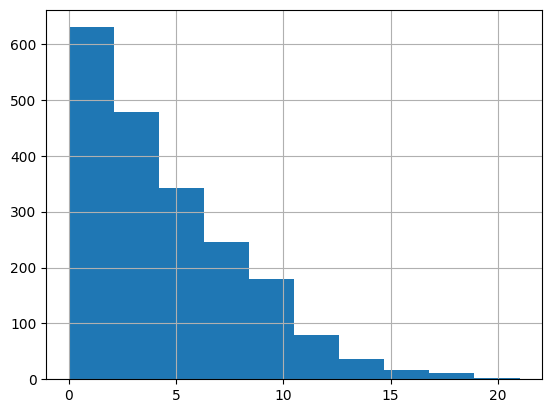

In [ ]:
df_rating_outlier = df_rating_outlier.apply(pd.to_numeric, errors='coerce')
df_rating_outlier["total"] = df_rating_outlier.sum(axis=1)
df_rating_outlier.total.hist(bins = 10)

This is a very interesting plot. We can see that only up to 400 rows don't have any outliers. Most rows have outliers and maybe they will be useful in the further classification tasks. Therefore we see no value in excluding the outliers from the dataset. However we will perform a transformation on the data so we can reduce its negative impact.

#### Data reshaping

We will now perform the following steps in each of the numerical data.
1. Normalize the data between 0 and 1 (and multiply by 1.000).
2. Apply log on base 10 on each of the variables.

### Again the plots

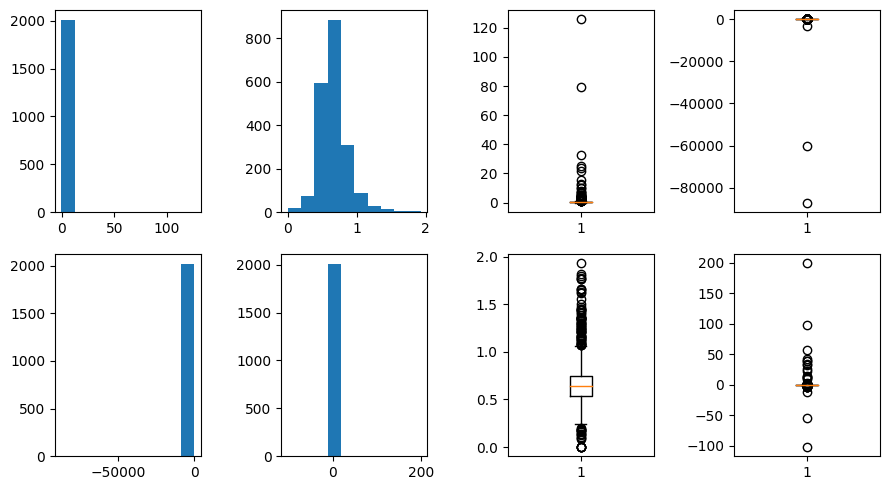

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df_rating[column_list[0]])
axes[0, 1].hist(df_rating[column_list[1]])
axes[1, 0].hist(df_rating[column_list[2]])
axes[1, 1].hist(df_rating[column_list[3]])

axes[0, 2].boxplot(df_rating[column_list[0]])
axes[1, 2].boxplot(df_rating[column_list[1]])
axes[0, 3].boxplot(df_rating[column_list[2]])
axes[1, 3].boxplot(df_rating[column_list[3]])

figure.tight_layout()

#Removing unecassary categories

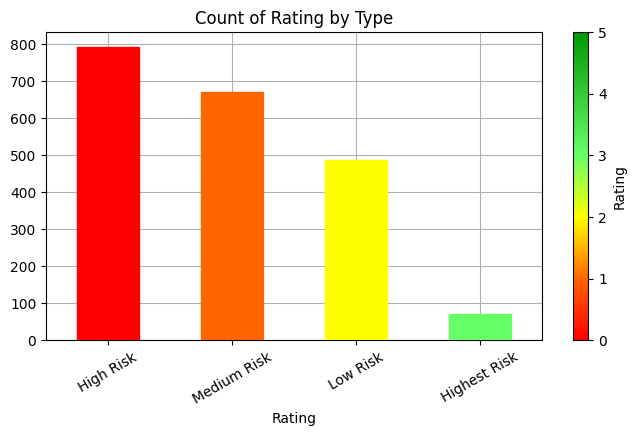

In [ ]:
ax = df_rating['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True,
                                             colormap=custom_cmap,
                                             zorder=3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
for i, rect in enumerate(ax.patches):
    rect.set_color(custom_cmap(i / (num_ratings - 1)))

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=0, vmax=num_ratings-1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Rating')

plt.show()

In [ ]:
df_rating = df_rating[df_rating['Rating'] != 'Highest Risk']

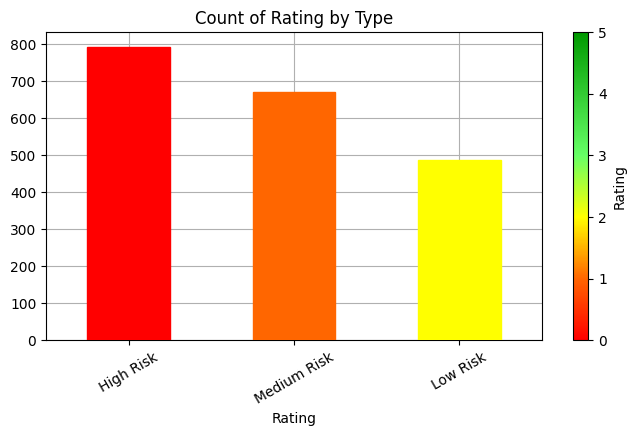

In [ ]:
ax = df_rating['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True,
                                             colormap=custom_cmap,
                                             zorder=3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
for i, rect in enumerate(ax.patches):
    rect.set_color(custom_cmap(i / (num_ratings - 1)))

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=0, vmax=num_ratings-1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Rating')

plt.show()

We have a problem with respect to vizualisation of the data. The impact of the outliers is so big that we cannot observe the patterns in the data. To enhance our visualization we will from now ignore outliers. We will replace then by values with lower impact such as the lower hinge. In this way we will be able to continue with our EDA. To preserve our dataset we will use a new table called `df_rating_no_out`.

#outliers

In [ ]:
df_rating_no_out = df_rating.copy()

for c in df_rating_no_out.columns[6:31]:

    q05 = df_rating_no_out[c].quantile(0.10)
    q95 = df_rating_no_out[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    df_rating_no_out.loc[df_rating_no_out[c] > fence_high,c] = df_rating_no_out[c].quantile(0.25)
    df_rating_no_out.loc[df_rating_no_out[c] < fence_low,c] = df_rating_no_out[c].quantile(0.75)


Now that we have this dataframe we can use it use it to observe the data from a different angle. We will be able to observe the distribution that was hidden by the outliers. The first step:
   - Plot all columns (boxplot) by each label:`High Risk`, `Low Risk`, `Medium Risk`.

#boxplot

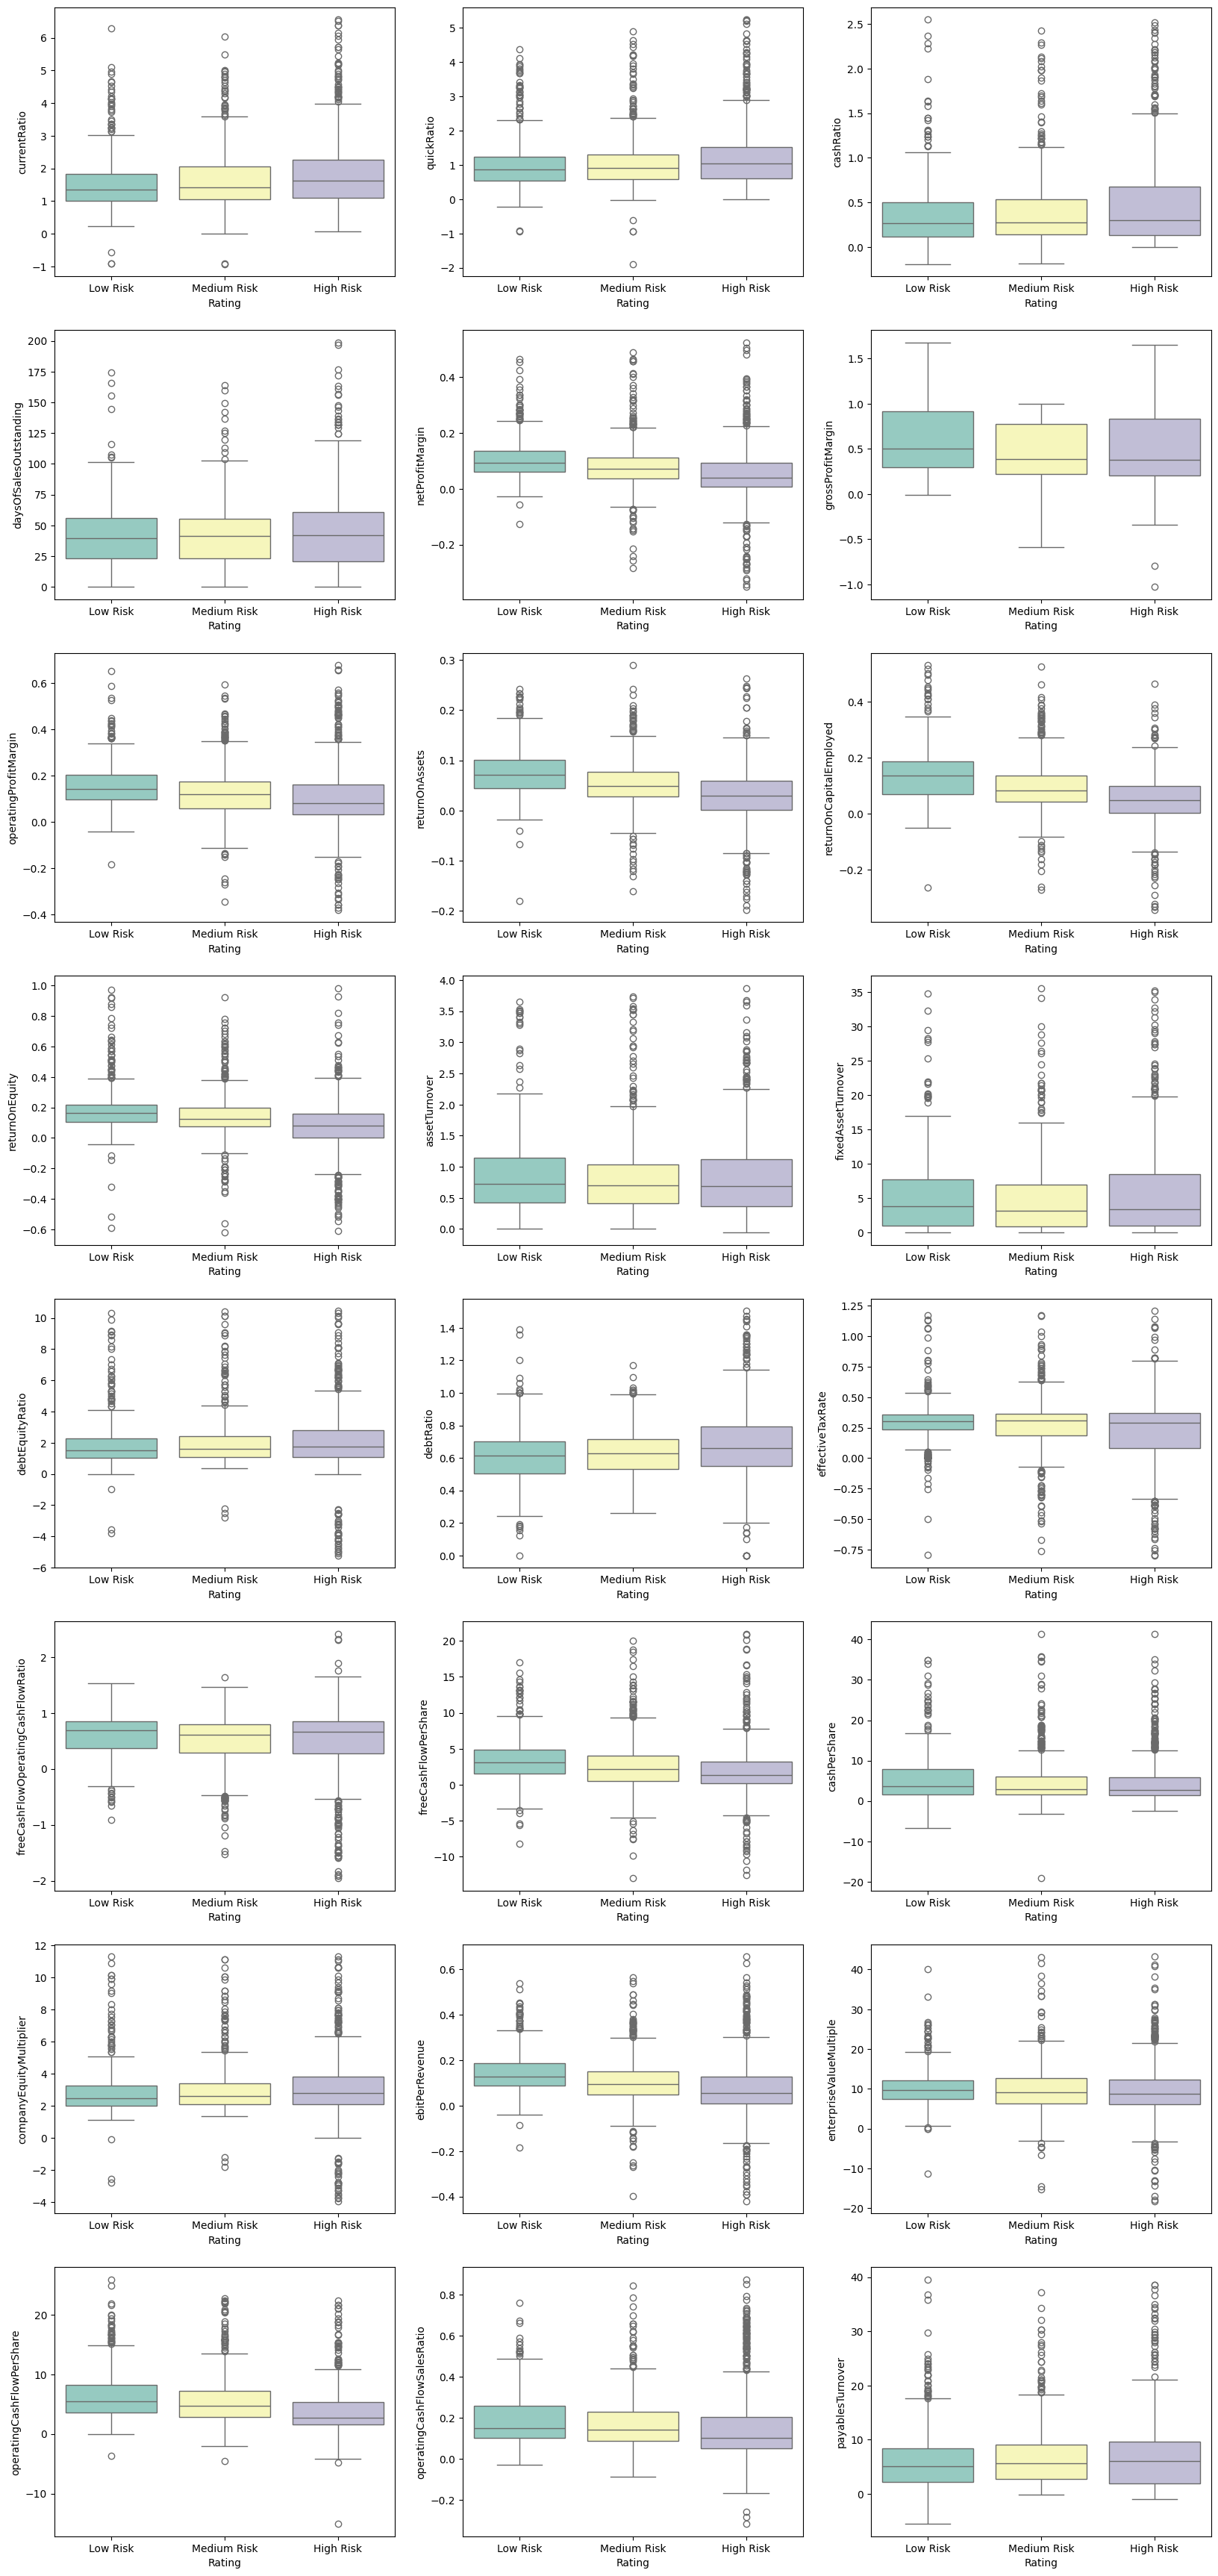

In [ ]:
figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20,44))

i = 0
j = 0

for c in df_rating_no_out.columns[6:30]:

    sns.boxplot(x=df_rating_no_out.Rating, y=df_rating_no_out[c], palette="Set3", ax=axes[i, j])

    if j == 2:
        j=0
        i+=1
    else:
        j+=1


The most interesting point about the previous plots is the fact that they clearly show a difference in the medians and distribution according to the rating (Risk). It points to a scenario where the variables will have good predictive power for classification. Following with our analysis we will create scatter plots to see if we can observe who the variables relate to each other and how labels can be observer in respect to it.

#scatterplot

In [ ]:
df_rating.colors = 'a'

df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Low Risk', 'color'] = 'Low'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'Medium Risk', 'color'] = 'Medium'
df_rating_no_out.loc[df_rating_no_out['Rating'] == 'High Risk','color'] = 'High'
custom_palette = {'High': 'brown', 'Medium': 'yellow', 'Low': 'green'}


In [ ]:
column_list = list(df_rating.columns[6:31])
column_list = sample(column_list,12)

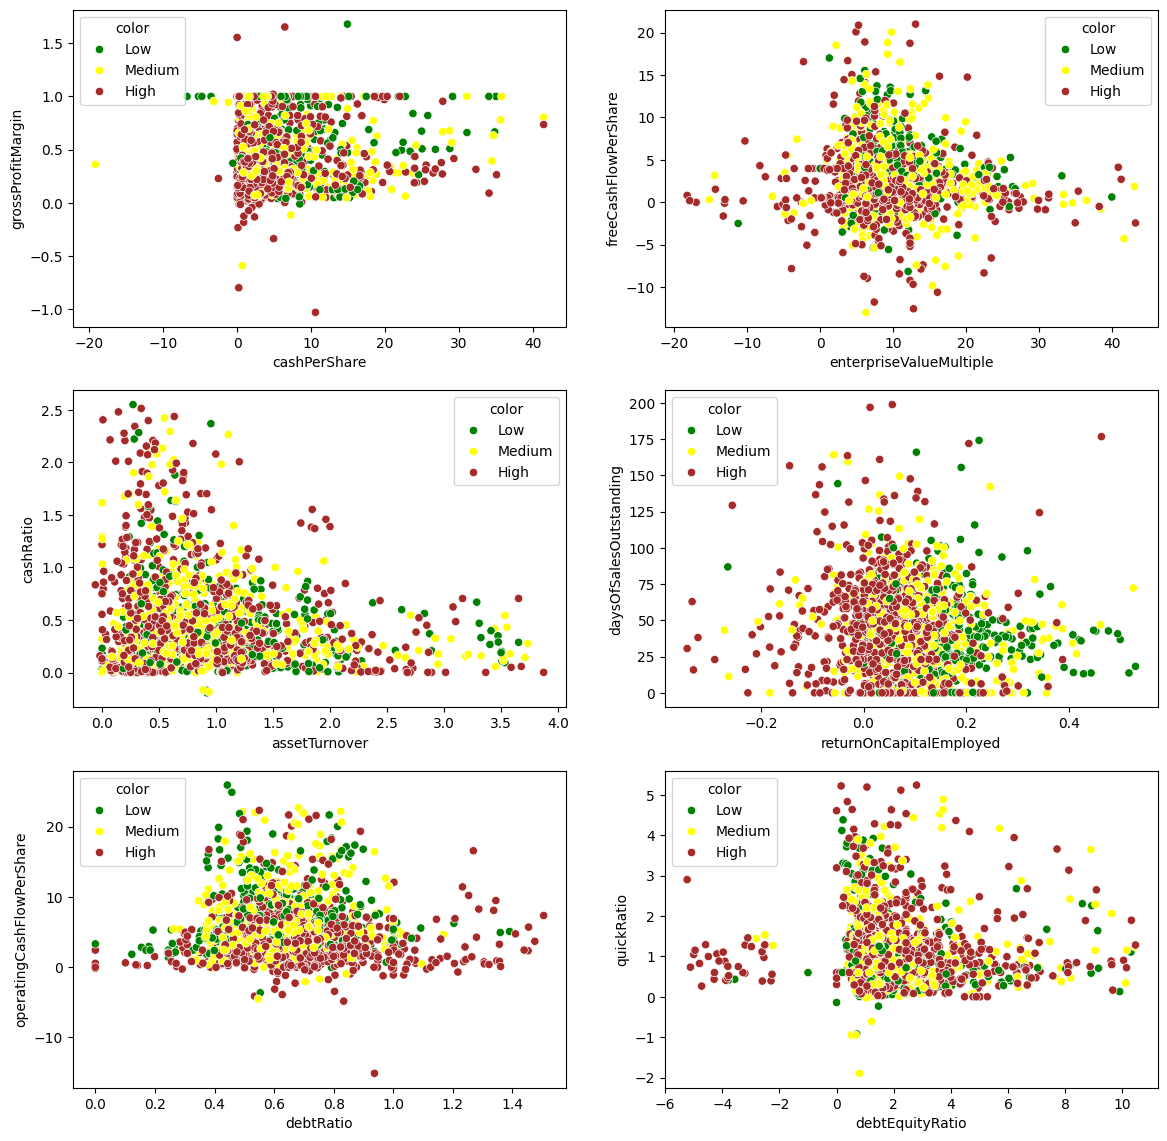

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))

i = 0
j = 0

for c in range(0,12, 2):

    sns.scatterplot(x = column_list[c], y=column_list[c+1], hue="color", palette=custom_palette, data=df_rating_no_out, ax=axes[j,i])

    if i == 1:
        i = 0
        j +=1

    else:
        i+=1

In fact, we are working with a dataset that has a big numer of dimensions. With two variables it would not be possible to make any predictions. However this is not the case. Unfortunately we are not able to vizualise the data in all its dimensions, but luckely we will be able to perform accurate classificaitons.

# Deep Learning

Is it possible to predict what credit profile a company will receive from a rating agency based on its financial indicators? If so, what are the most important predictors? Apparently not much work has been done with regards to this question. As we will do it, it tests most DL algorithms and identifies the most important features.

In the following steps we will perform the following:

1. Prepare the dataset
    - Split in train and test
    - Transform/Encode the features kand labels
2. Make deep learning model
2. Compare the accuracry of Through ROC CURVE.
4. Choose our winning model and tune hyperparameters to target a higher accuracy.
5. Make a more profound evaluation of the result with a confusion matrix and different measures.
6. identify the most important features to predict the rating.



## Prepare the Dataset

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_rating.Sector)
df_rating.Sector = le.transform(df_rating.Sector) # encode sector
le.fit(df_rating.Rating)
df_rating.Rating = le.transform(df_rating.Rating) # encode rating

In [ ]:
df_train, df_test = train_test_split(df_rating, test_size=0.2, random_state = 1234)

In [ ]:
X_train, y_train = df_train.iloc[:,5:31], df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,5:31], df_test.iloc[:,0]

# Fit Models

Now we will test a Suquential Deep learning  models. In each we will fit the model in the train data, make predictons for the test data and  obtain the accuracy. In later steps we will compare the accuracy of all the models.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

output_classes = 5



model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.3507 - loss: 1.3152 - val_accuracy: 0.3686 - val_loss: 1.1148
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3915 - loss: 1.1762 - val_accuracy: 0.3718 - val_loss: 1.1132
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4083 - loss: 1.1220 - val_accuracy: 0.3686 - val_loss: 1.1047
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4331 - loss: 1.0952 - val_accuracy: 0.3718 - val_loss: 1.1152
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4220 - loss: 1.0819 - val_accuracy: 0.3782 - val_loss: 1.1124
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4029 - loss: 1.0721 - val_accuracy: 0.4071 - val_loss: 1.1217
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4253 - loss: 1.0806 - val_accuracy: 0.3686 - val_loss: 1.1187
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4539 - loss: 1.0634 - val_accuracy: 0.3686 - val_loss: 1.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, roc_auc_score,auc
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = np.mean(y_pred == y_test)
print(f'Test accuracy: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Test accuracy: 0.38
Confusion Matrix:
[[ 29   0 129]
 [  6   0  94]
 [ 14   0 118]]


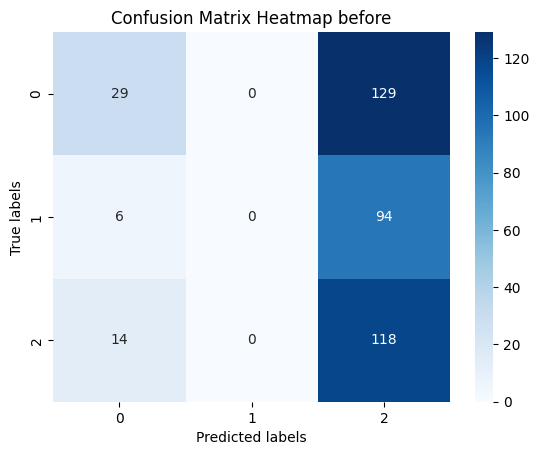

In [ ]:
# Plot heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap before')
plt.show()

In [ ]:
# Generate classification report
le_sector = preprocessing.LabelEncoder()
le_rating = preprocessing.LabelEncoder()
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Repor before:")
print(report)

Classification Repor before:
              precision    recall  f1-score   support

           0       0.59      0.18      0.28       158
           1       0.00      0.00      0.00       100
           2       0.35      0.89      0.50       132

    accuracy                           0.38       390
   macro avg       0.31      0.36      0.26       390
weighted avg       0.36      0.38      0.28       390



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


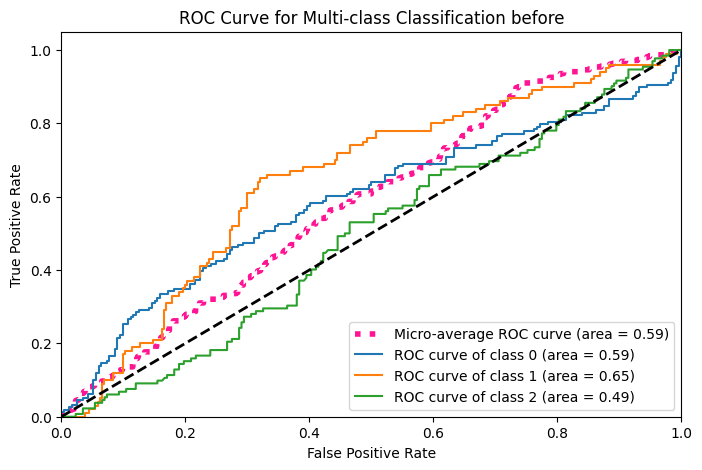

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(np.eye(len(np.unique(y_train)))[y_test].ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification before')
plt.legend(loc="lower right")
plt.show()

#HYPER PARAMETER TUNING WITH SCIKERAS

In [ ]:
!pip install scikeras

from scikeras.wrappers import KerasRegressor


In [ ]:
import keras
import keras.utils
from keras import utils as np_utils
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import make_scorer, mean_squared_error

def create_model(optimizer='adam', dropout=0.1, activation='relu', dense_layer_sizes=1, init='uniform', nbr_features=X_train.shape[1], dense_nparams=3):
    model = Sequential()
    model.add(Dense(dense_nparams, activation=activation, input_shape=(nbr_features,)))
    model.add(Dropout(dropout))
    for _ in range(dense_layer_sizes-1):
        model.add(Dense(dense_nparams, activation=activation, kernel_initializer=init))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


In [ ]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=1)

#def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=1, init='uniform', nbr_features=trainX.shape[0], dense_nparams=[3]):

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
# search the grid
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
### updates
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv,  verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 52776.4375
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59801.1328
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42720.1914 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113286.3672
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44457.6445
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109297.2656
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69540.9922  
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90405.6328
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37416.5781
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30952.8398 
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 153742.1719
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36031.5664
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45804.3047 
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112086.9375 
Epoch 15/50
17/17 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 693326.1250
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 223059.6250
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71201.7344
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141675.5938
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157244.1719
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 351984.6250
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156022.3906
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75541.5781
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158429.0312
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 203233.0000
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96422.1250
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 234001.2500
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29655.6191
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109961.7031
Epoch 15/50
33/33 ━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 297915360.0000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31869452.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150448832.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8906554.0000
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99116448.0000 
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41448988.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2204234.7500
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7110969.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33605692.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33483828.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7678853.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3582287.7500
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13803542.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 196

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 178220128.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253245680.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126503736.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60277328.0000
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9984273.0000 
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49726736.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63127380.0000
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8196445.5000
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13107167.0000
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31624012.0000
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24675122.0000
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16555939.0000
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 247626.3438
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1967247.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 270006.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 403175.8750
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72290.1406
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50720.7070
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203374.5000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255318.7344
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33112.2031
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13728.6191
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14653.4229
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251577.4531
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30654.0605
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9211.7930
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 133830.2812
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49119.6914
Epoch 15/50
82/82 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 221967.8594
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 391553.8438
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 480155.1562
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 289415.5625 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 714138.5625   
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 331607.4062 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 352683.1250  
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218598.7344
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177512.0469
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86975.6875
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176958.9844
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 290063.2188
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 280630.4062
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 457881.8750  
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1372606.8750   
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1389844.5000
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 938693.8125
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 782381.8750
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 166885.1094
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 322349.4688
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 191404.7188
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 354811.0000
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 771492.5625
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 82655.8516
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 94131.2344
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 173431.1719 
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60267.8789 
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38656.6719
Epoch 15/1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1160485760.0000
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113066488.0000
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 764725504.0000
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172676512.0000
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114021152.0000
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31964812.0000
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114265888.0000
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18047174.0000
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1563485.6250
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 603368.0625
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130926352.0000
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38134520.0000
Epoch 13/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2086031.8750
Epoch 14/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 60415553536.0000
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8894569472.0000
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13294633984.0000
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32660707328.0000
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22996627456.0000
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7874986496.0000
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2753034240.0000
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5130086400.0000
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6042931200.0000
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6933580288.0000
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26018686976.0000
Epoch 12/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23422488576.0000
Epoch 13/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3827144192.0000
Epoch 14/100
65/65 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5383898112.0000
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3048217088.0000
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 622908224.0000
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183334624.0000
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165379152.0000
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 471935104.0000
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 572243264.0000
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 569184256.0000
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1546694016.0000
Epoch 10/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299967648.0000
Epoch 11/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 828691712.0000
Epoch 12/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8814618.0000
Epoch 13/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2280674.7500
Epoch 14/100
82/82 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45145.2227 
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69482.5391  
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62607.4688 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114626.8594
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55833.4961
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36835.2500
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53499.3125 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49884.3867 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35810.8203
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93831.0547  
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41886.7656
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80185.5078  
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49366.9258 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14093.4033
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1129196.5000
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 912397.0000 
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1130987.1250
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 470126.1562
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1230637.0000 
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 702265.4375
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1614473.2500 
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1046848.2500
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 188537.3750
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 382051.0312  
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 451824.5312
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210301.8438
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124709.0859
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 514209.2188  
Epoch 15/50
17

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17907608.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31539976.0000  
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1760970.6250
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6532745.0000 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2059162.6250
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 953738.4375
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150280.7812
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 163591.9844
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 360741.1875 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72666.0703 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93995.3828  
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57721.8008
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185683.7031
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79496.8438
Epoch 15/50
25/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 38532386816.0000
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17288708096.0000
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52033679360.0000
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38534201344.0000
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30655365120.0000
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20022599680.0000
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40419106816.0000
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30654308352.0000
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27149791232.0000
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21479376896.0000
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9025741824.0000
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30350014464.0000  
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18858436608.0000
Epoch 14/50
33/33 ━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57354788864.0000
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114976800768.0000
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5410579456.0000
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24274202624.0000
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19298918400.0000
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10511108096.0000
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21626507264.0000
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41847762944.0000
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33199620096.0000
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4931547648.0000
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24563623936.0000
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33380433920.0000
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11038927872.0000
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 191116.6875  
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118246.3203
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 293273.3125 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112698.1641
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125548.6719
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82138.2422
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26089.6738 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137511.6719
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74022.2188
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131006.6094 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54882.8555
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46766.7500
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19769.0469
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51574.2656
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8837.7939
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14519.6895 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1939.1857
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2061.5056
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1085.7749
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1636.4816
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6647.4561
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1321.0293
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1352.2882
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2046.6270
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1954.2513 
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 626.9637
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 465.5291
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1158.2445
Epoch 15/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1001104.0000 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111931808.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55005884.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 707640448.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57400792.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47274384.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 465544608.0000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 459783.0938
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 165125792.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120591784.0000
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20488256.0000
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45264780.0000
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47391.2852
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26722816.0000
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7083312.5000
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7581426.5000
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7196363.0000
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9773801.0000
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11447445.0000
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27683802.0000
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7112352.5000
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5114078.0000
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10667387.0000
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11685549.0000
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7327970.5000
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4632713.0000
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8944267

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5759396352.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3065741824.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2002388480.0000
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4365806080.0000
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1319817984.0000
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 961467072.0000
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3393930240.0000
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1874720384.0000
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2635393792.0000
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2692516864.0000
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 669813312.0000
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 626395392.0000
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1107206400.0000
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50152.5742  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60486.9688 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50636.3281 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27933.2461
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34684.8203
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48307.0625 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50688.4883 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38935.5000 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19650.2949 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27469.5938 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17459.2188
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30518.3438 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26144.7461 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50253.6719 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss:

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62139.1484 
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85820.1328 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72040.4453
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 146925.2500 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42825.1250  
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91872.2422 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45653.2539
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39530.4961 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33278.0039
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24573.0762
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10896.4111 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51484.0352
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17416.9414 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47931.8750
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=64, epochs=50; total time=   5.8s
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2555773184.0000
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 429126816.0000
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 391863744.0000
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 351296672.0000
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1109800192.0000
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 799626048.0000
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 393523456.0000
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 352863936.0000
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1332146176.0000
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 725851072.0000
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 428805536.0000
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 320303136.0000
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11095806.0000   
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1688374.3750
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3962048.5000
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 509690.0312 
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1257379.0000
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4189849.0000  
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2057346.3750
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 908568.0000
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1989498.3750
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2270634.7500 
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2181219.2500
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1170491.2500
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1416619.2500 
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2140302.7500  
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10748991488.0000
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2211965696.0000
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7771570176.0000
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10657635328.0000
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3793162752.0000
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10822032384.0000
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2968186624.0000
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4874964480.0000
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4343406592.0000
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1748513664.0000
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8068528128.0000
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4981643264.0000  
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5771287552.0000
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 175240.2500
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123263.8203
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117242.5938
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157987.1719
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 152340.9531 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122373.4297
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 141287.7656
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 162864.7656 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85963.6016 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 199982.4531 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 145558.9688 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87462.7656
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76039.9062
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 126561.5859 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1672413.5000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1596677.6250
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4052331.2500
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4221082.5000
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2605243.5000
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2889649.5000
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 874124.2500
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5026339.0000 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2433535.5000
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3023912.0000
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5201650.5000  
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5316323.0000  
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3589912.7500
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1859625.2500
Epoch 15/100
9/9 ━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2866751.7500
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9744033.0000   
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6539411.5000  
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3627712.7500
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3211967.2500
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2344670.0000
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1731170.6250
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2441935.5000
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3541165.5000  
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1054011.0000
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1103785.5000
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2053264.5000 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2134036.5000 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 578

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43562909696.0000    
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29302003712.0000
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127539273728.0000 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109248864256.0000 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19257643008.0000
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19200366592.0000
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106057777152.0000  
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20253698048.0000
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13763605504.0000
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22485870592.0000
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8818243584.0000
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16243914752.0000
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10231014400.0000
Epoch 14/1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 761345600.0000
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2160820480.0000  
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 914971328.0000
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 335554112.0000
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 873529216.0000
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 943503680.0000
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 642817664.0000
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 520112992.0000
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1324054656.0000 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 202820048.0000
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 286828544.0000
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 296124096.0000
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 191423440.0000
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1451523456.0000
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1140287872.0000
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1551392384.0000
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 368121120.0000
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3728552.7500
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1911847424.0000
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182830160.0000
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 380463680.0000
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2175040768.0000
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136877024.0000
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 373280608.0000
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 640200704.0000
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 716157312.0000
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.403077 using {'batch_size': 16, 'epochs': 50}
0.403077 (0.017440) with: {'batch_size': 16, 'epochs': 50}
0.403077 (0.017440) with: {'batch_size': 16, 'epochs': 100}
0.403077 (0.017440) with: {'batch_size': 32, 'epochs': 50}
0.403077 (0.017440) with: {'batch_size': 32, 'epochs': 100}
0.403077 (0.017440) with: {'batch_size': 64, 'epochs': 50}
0.403077 (0.017440) with: {'batch_size': 64, 'epochs': 100}


In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, verbose=1)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(optimizer=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv,verbose=2)
grid_result = grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 245927.7344 
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41161.8516 
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229390.2812  
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16783.3672 
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85607.8047
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145170.8594
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94389.9766
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34360.0352
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75413.7656
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62856.0273
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81282.7891
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36986.1367
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5747.0024  
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65415.9102
Epoch 15/50
17/17 ━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 38734.0625
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28460.5098
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22456.6387
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22311.1367
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4106.2354
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4845.9351
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4616.9009
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4168.3916
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7466.2749
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4210.9326
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3102.6724
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1563.3792
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3450.4263
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1015.2587
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1564325.6250
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 803967.4375
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 334468.5938
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 301203.7500
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76389.2891
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 448623.3750
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31292.0508
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89659.3672 
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9859.8301
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6277.4805
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11401.3506
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7885.9487
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2832.8953
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1287.1169
Epoch 15/50
49/49 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18126368768.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25029615616.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14228961280.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20250896384.0000
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27346706432.0000
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17497389056.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7538419200.0000 
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8832575488.0000 
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1430069376.0000
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 383732352.0000
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 816646336.0000 
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 283629792.0000
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1620993408.0000
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1842455.3750
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6416625152.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 198844544.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2594868736.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130679720.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 463237856.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2443002112.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1242111744.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1334629120.0000
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2210254592.0000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 267778032.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32857418.0000
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50840.9961
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41292.6797   
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15261.6494
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24658.8340
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22887.0469
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17214.8633
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29475.0332  
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18841.7383
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25523.6484
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15885.1348 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26690.9277  
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22572.0645 
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15452.1299
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24125.0938 
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17274.4238 
Epoch 15/50
17/17 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21464.7363
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13585.6113
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17253.8809
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11898.1504
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3299.8928
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9270.8535
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12285.7275
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4862.3237
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11169.5654
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4103.5371
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9961.8672 
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2982.3081
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4253.5576
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3367.3682
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6455002.5000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2230850.7500
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2224221.2500
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3535507.7500
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6548978.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1566342.5000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2974360.7500
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1020436.5625
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 285806.1875
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 709357.5000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1229511.5000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3047087.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1051069.8750
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 136038.8125
Epoch 15/50
49/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11625900032.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13208810496.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13277683712.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13586330624.0000
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5617016320.0000
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6030852096.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2042740736.0000
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5514796032.0000
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15816993792.0000
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1805556096.0000
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1221668480.0000
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1543851648.0000
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2203278336.0000
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5411330560.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4925664768.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3752671232.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2963711488.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5011906048.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1823667328.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2228998656.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2006658816.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181139280.0000
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1103109248.0000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 874588352.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 392481888.0000
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 410372544.0000
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78391.5938 
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23271.1055
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29457.6113 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17144.2227
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17668.9004  
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5822.5063
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9787.1650
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12817.3779
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24340.8223 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31358.9121
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12372.4404
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35640.7305 
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32562.1699
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10354.4209
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3667953.0000 
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15166541.0000
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6371967.5000
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14418796.0000 
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1856120.0000
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4784986.0000
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4656427.5000
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5736392.0000
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3979664.0000
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2253631.5000
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3995819.5000
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1941245.8750
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10910929.0000 
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1439781.1250
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11438631936.0000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2868362496.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4525591040.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9170099200.0000 
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4595377152.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4691189248.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4375492096.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 869174272.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3440909824.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210429488.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 732329984.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2238613248.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5485591040.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1030206.6250
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 237973.3125
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 105244.6797
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42749.4688
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11858.5771
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42603.1680
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27496.2383
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71111.6875
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 153895.5312
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49177.1562
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 243908.3594
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53051.9180
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5326.5430
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49313.6914
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 242409.0781
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 342197.8125
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 173766.9375
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227466.9531
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256258.4531
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41960.8516
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 105320.6797
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42984.3672
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46073.6484
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73882.6797
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96584.6328 
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37550.9414
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20624.5820
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24237.1562
Epoch 15/50
82/82 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18669.2285
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5736.1655
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3491.2368
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28496.8105  
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17642.2871
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25242.0000  
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2344.3992
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3296.3035
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2149.9041 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5847.9722 
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22419.7910   
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3014.6650
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1914.4058
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2222.0815 
Epoch 15/50
17/17 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 358155.5000
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1569621.7500
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 967524.3750
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1266466.5000
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1361698.0000
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2947861.0000
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1359070.5000
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1154069.0000
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4107838.2500
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 518299.8125
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202616.8594
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2667488.5000
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 676694.0000
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 383093.9062
Epoch 15/50
33/33 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8475858944.0000 
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 649344896.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2633796608.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5660353024.0000
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222756864.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4740699136.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178662208.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2377890304.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196579744.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1169838848.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2407178.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108638504.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1645550.7500
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7595964.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 929374.3750
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2363709.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1941551.7500
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1017641.8750
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2113931.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229192.0938
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 246258.0469
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 568624.1875
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 319725.5625
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 218581.5000
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 259906.2031
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40442.6406
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52226.2148
Epoch 15/50
65/65 ━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 123828608.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1814789376.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33717552.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24592524.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96113880.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28185276.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5433082.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89007560.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13511953.0000
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11593454.0000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20915680.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27554536.0000
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8148856.5000
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10778928.00

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13718.3389   
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14709.0869 
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6240.8057
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4469.3882
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5376.5439  
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10149.5361
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9099.6982   
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7687.1606
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4508.6631
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 753.9771
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5426.6138
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3813.6885   
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2707.2327
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1756.4161
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2891.3594  
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8895.2578  
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6542.1704
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3166.5964
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5092.3013
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4584.8613
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4415.7456
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1939.4558
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2971.9739 
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3697.5825
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 527.8717
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1734.5050
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2750.1128
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1856.5159 
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 223699264.0000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 148997152.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 948124032.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1493552384.0000
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 401770496.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 419140032.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99529536.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27287086.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49256184.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10979016.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18697260.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14897351.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1175162752.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21150.8672
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7111.0820
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11479.1680
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21430.4141
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4738.9858
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6014.8765
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3724.1179
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1780.7455
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8281.2266
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2378.1299
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4401.3843
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13565.6426
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1130.0780
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1074.6310
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6807830528.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2454764288.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2193696512.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4933634560.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 362661024.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1139873024.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 274677696.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 753866176.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 415184928.0000
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81380304.0000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183798288.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111469712.0000
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36166276.0000
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 174027.7500
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174732.5000
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69935.2422 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108660.2656
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 232867.1250
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253811.4844  
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52862.2891
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74799.7500 
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68487.0000 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70272.9688
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76237.5391
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 177444.2969
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59651.5977
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103434.7969
Epoch 15/50
17/17 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5321848.5000
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2127745.0000
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3811113.2500
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2794671.5000
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 499604.5938
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1108144.5000
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2616118.7500
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1211386.1250
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 803259.2500
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 517982.1562
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1250079.0000
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 883529.6875
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 888690.1250
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 348928.0000
Epoch 15/50
33/33 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 98025136.0000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 706213184.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1778981248.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7630528512.0000
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 475423744.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1866703616.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3604161536.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131177712.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1956548352.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 922902400.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3438853888.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47577304.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2010696448.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 851670336.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 428924864.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1483165312.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2470605056.0000
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 291965056.0000
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210034256.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 138154576.0000
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 76537872.0000
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 390543680.0000
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 228826560.0000
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5427815.0000
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52151976.0000
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62580136.0000
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15430021.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18278538.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4120170.5000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 457646.8438
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6616686.5000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 662511.9375
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 575365.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 526825.7500
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87736.6250
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1767114.5000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32492.2793
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1726126.8750
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27225.4863
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45488.4453
Epoch 15/50
82/82 ━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26850580480.0000
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17237792768.0000
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5241082368.0000
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25200920576.0000
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1174181504.0000
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10671939584.0000
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11536621568.0000
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2094971008.0000
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20414857216.0000
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4537020416.0000
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1168738560.0000
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4146892544.0000
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1406544640.0000
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.403077 using {'optimizer': 'SGD'}
0.403077 (0.017440) with: {'optimizer': 'SGD'}
0.403077 (0.017440) with: {'optimizer': 'RMSprop'}
0.403077 (0.017440) with: {'optimizer': 'Adagrad'}
0.403077 (0.017440) with: {'optimizer': 'Adadelta'}
0.403077 (0.017440) with: {'optimizer': 'Adam'}
0.403077 (0.017440) with: {'optimizer': 'Nadam'}


In [ ]:
model = KerasClassifier(build_fn=create_model,
                        epochs=50, batch_size=16, verbose=1,optimizer='SGD')

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(model__dropout=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv,verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 70860.4609
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32040.1367
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54697.6211
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64556.7539
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27916.3457
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14628.2793
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131340.5938 
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17939.3574 
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19166.2031
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47940.0977
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89616.2969  
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26969.9629
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22957.9297
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70392.0391  
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 287120.3125    
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 115403.9453
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 105605.4141
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23335.3281
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27024.8125
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39825.1914 
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59088.3164
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24139.2578
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36580.3320
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34589.1992
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49832.4883 
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28548.8652
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23865.1211
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47047.3164  
Epoch 15/50
33/33 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3641.7432
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9527.3105
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9203.9785
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2570.4331
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16817.0469
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6942.5029
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2247.5491
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5555.5767
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3255.8853
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1334.1511
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1023.2563
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 857.6135
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 782.0176
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 872.1906
Epoch 15/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7028045824.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4392415232.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10777776128.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1540046336.0000
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1265202176.0000
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3809457152.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1278291712.0000
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1733777792.0000
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 262486368.0000
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 800064640.0000
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1810580736.0000
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 829807424.0000
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1741092992.0000
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1924086400.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1671054976.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 807942336.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 363701184.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 616514880.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 623986752.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 603193856.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222977632.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 277442240.0000
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 247854336.0000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 571371328.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 155386144.0000
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43428104.0000
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 404032.0000  
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 263010.1875
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 488501.3750
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 235988.9219
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 231825.5000
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 352572.0000
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155803.2188
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134782.0000
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183904.2188
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 284246.1250
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103224.7266
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197199.6562
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 246698.5625 
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92257.5625
Epoch 15/50
17/17 ━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8872273.0000   
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3164995.2500
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4239023.5000
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7475440.5000
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4571321.0000
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1519382.0000
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2570295.7500
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5035942.5000
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1931547.6250
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2992819.2500
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1333737.0000
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1842432.2500
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4925852.0000
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 910971.9375
Epoch 15/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 353235232.0000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1702023424.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 505285824.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 979685248.0000 
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 890425664.0000 
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 427193088.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111372912.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128392512.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 668114496.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23872556.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21297420.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11602751.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10161658.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6960.3486
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6433.0181
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3889.6235
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16753.7090
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8471.9316
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8726.1641 
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9649.4385 
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3843.0144
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8563.0889 
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3886.4629
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4197.5391
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4183.5947
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2026.7325
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 775.6072
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 285422656.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130867344.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109297424.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9866907.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36826872.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8651906.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3904046.7500
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 592457.0625
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 544271.6250
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 403359.4062
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 544261.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169627.7344
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103909.2422
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52945.5000
Epoch 15/50
8

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 228792.3281
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159149.4844
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 104112.7812
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151187.8438 
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110810.2422
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 187794.7031
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 195649.8906 
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54535.5117
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159483.6250
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68312.0938
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180425.2812  
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109126.7969 
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58293.5977
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59956.5391
Epoch 15/50
17/17 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 381840.2188
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141190.0938
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177734.9219
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46106.3438
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 367236.8750
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111958.3906
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 60558.2461
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38923.2773
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21198.5781
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9010.2705
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10741.4893
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4927.0503
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 149305.7656
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3684.8376  
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5220523008.0000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2112226432.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3958688256.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7721865728.0000 
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1606568448.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2539890176.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 956717952.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1191288192.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1552886400.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3520106240.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 539776512.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1523541888.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 684288960.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11396106240.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18250901504.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5612702720.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9277363200.0000 
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2898200832.0000
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161311488.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 708040256.0000
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7862741504.0000 
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 861346432.0000
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4745765376.0000
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6926785024.0000 
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 348221568.0000
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 527291808.0000
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 918194.1875
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35313336.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4631497.5000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20571994.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41333152.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23136600.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32060130.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11889745.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1274133.3750
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52214.3320
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61640.2773
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56722.3789
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30692.2656
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2651.2290
Epoch 15/50
82/82 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73162.8750    
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56009.9414  
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51159.4297 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34939.4375 
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79520.1094  
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72943.3594
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44619.7461
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33462.6836 
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24571.3164
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32472.1270
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18152.6152
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62074.4961
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26894.6172
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35998.8594
Epoch 15/50
17/17 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33069.2656  
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102758.2656
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194457.4219
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99087.3594
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79753.2266
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81130.9766
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50210.6406
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54891.6602
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62188.7031
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68861.1953
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7566.7163
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17222.7910
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85835.9141  
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40128.5898
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1898105.2500
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 285361760.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77320840.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24120328.0000
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107425280.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74918864.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20325344.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55315512.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8226430.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33407322.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9103922.0000 
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 354672.2500
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65113172.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11896108.0000


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 123245728.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140564112.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 198083600.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180925360.0000
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25044468.0000
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11349275.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43660524.0000
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1128065.3750
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3539534.5000
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2302635.2500
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13761286.0000
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1859866.8750
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1092305.6250
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 826490.2500
E

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8295169024.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14272013312.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13640714240.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6451296256.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8556868096.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5415381504.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6086163968.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8733838336.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3153855744.0000
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6047011840.0000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5507485696.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10453534720.0000
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1790003968.0000
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16760.4062 
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7393.1602  
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38345.8008  
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9133.6387
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8747.3242
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15714.5635 
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14585.1797
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8824.4277
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6733.1812   
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12663.6787 
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3892.0586
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5911.2759
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8193.9756
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14063.3711 
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21484288.0000
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50890824.0000
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10366595.0000 
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21762638.0000
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15894143.0000
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15435893.0000
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10934480.0000
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5859479.5000
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2228271.7500
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 952052.0000
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1768919.3750
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22206694.0000
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1654025.0000
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9932843.0000 
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7636761600.0000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4650842624.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9120978944.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18540732416.0000
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 412075872.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6485683712.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6464911872.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18322352128.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10656704512.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4413573632.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 168177280.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 699594.7500
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 659389952.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8044744.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3823465.7500
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2950428.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2301388.2500
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2268835.7500
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1702376.1250
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 361182.5312
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2496078.0000
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1503877.2500
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1972516.7500
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 899665.2500
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 832382.5000
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 668709.3125
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1134952.5000
Epoch 15/50
65/6

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 994328064.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 301245632.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 319401376.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 279915136.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1049557888.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145408128.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193434576.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161707568.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34496036.0000
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9344568.0000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35070940.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56636852.0000
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14563611.0000
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1719

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20078.3613 
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69453.1797   
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17399.1641
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54454.5078
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3799.6956
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90938.9844   
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36893.3789
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51485.1953
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90025.4531
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28715.4355
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 484.1425
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111835.4922 
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1676.5298
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64429.3281
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 656274.1875
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1144367.3750
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2382071.2500
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197872.5938
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165999.6875
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 833753.1875
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 592191.1875
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18081.8066
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 282828.4375
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 636259.4375
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 422547.0000
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46878.4727
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85471.1562
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 650362.1875
Epoch 15/50
33/33 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48465472.0000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13029427.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6514611712.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3547228416.0000
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3887698.2500
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10440477696.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2237923328.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7197580.5000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9643994112.0000 
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58854808.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14768810.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5876768256.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 704895872.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3499001344.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1730267904.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 158509170688.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14218839040.0000
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7590629376.0000
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3630649600.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19233542144.0000
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3372643840.0000
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 789636672.0000
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18701502464.0000
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 491656.7500
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1973181568.0000
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41331036160.0000
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19320735744.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9360117760.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51970686976.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21412823040.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4913517568.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37837717504.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20813355008.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9783506944.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99359268864.0000 
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3946856704.0000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19865370624.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 305270016.0000
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3623281920.0000
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6252885.0000
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3062202.7500
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21146308.0000
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 753044.5000
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 486786.5625
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204126.7188
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 874809.8750
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 416427.0312
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22175.3691
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 168598.1875
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30838.1680
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30707.5020
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55623.1211
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17699.2617
Epoch 15/50
98/98 ━━━━━━━━━

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.403077 using {'model__dropout': 0.0}
0.403077 (0.017440) with: {'model__dropout': 0.0}
0.403077 (0.017440) with: {'model__dropout': 0.01}
0.403077 (0.017440) with: {'model__dropout': 0.05}
0.403077 (0.017440) with: {'model__dropout': 0.1}
0.403077 (0.017440) with: {'model__dropout': 0.2}
0.403077 (0.017440) with: {'model__dropout': 0.5}


In [ ]:
model = KerasClassifier(build_fn=create_model,
                        epochs=50, batch_size=16, verbose=1,optimizer='SGD')

# define the grid search parameters
act = ['relu', 'tanh', 'sigmoid', 'linear']
param_grid = dict(model__activation=act)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, verbose=2, scoring=mse_scorer)

grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 80646.9922
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 198364.4844 
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75210.0859
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75058.7109
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48384.4141
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117728.4375
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29604.6953
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19412.8242
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73482.6250
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28804.0977 
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38187.0586
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20603.5527 
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36716.0938 
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76242.1172  
Epoch 15/50
17/17 ━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3128109.2500
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 656134.3750
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 603056.4375
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 518928.1250
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1232259.0000
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2804218.0000
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 742127.5625
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 400747.2812
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 702060.5625
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1302432.5000
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1319591.7500
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1737987.3750
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 945250.3125 
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 435129.5625
Epoch 15/50
33/33 ━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4370713.5000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 296940928.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12365512704.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11056420864.0000
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6065354.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6731596800.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6554530304.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1745755776.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4235314944.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1367947392.0000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3994969088.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 492278816.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 900617856.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 40501544.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31521666.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35181640.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1674230.8750
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6732639.0000
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 547959.6875
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 313079.2188
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 554895.6250
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 245103.0469
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250161.6406
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165763.9688
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33622.6992
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22584.6426
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 60861.9570
Epoch 15/50
65/65 ━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12939988.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5338647.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5473070.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5210413.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2711602.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8341853.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1609819.6250
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6803101.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1380815.7500
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 824153.3125
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 665983.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 793852.1875
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 577468.3125
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 506693.5000
Epoch 15/50
82/8

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3407
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3563 
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1134 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0773 
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9646  
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2944 
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0697 
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1286 
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0255 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9854  
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9840  
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0584 
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1275 
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0514 
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9245 
Epoch 16/50
1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1225   
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1987 
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6238 
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7154 
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4598 
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4968 
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3658 
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6693 
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3379
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1765 
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2433 
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1846 
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0702 
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0933 
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0713
Epoch 16/50
33/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4116
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6973
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1427
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8072
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5907
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3992
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1322
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1672
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0404
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1159
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0013
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0551
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9707
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9231
Epoch 15/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0092
Epoch 16/50
49/49 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2820
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8787
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3627
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1941
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1019
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0816
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9557
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9771
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9302
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8854
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8996
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8654
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8555
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8409
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8114
Epoch 16/50
65/65 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9475
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0061
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7874
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4670
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2857
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3231
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2328
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9782
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9329
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0509
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9428
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9072
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9611
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8649
Epoch 15/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8665
Epoch 16/50
82/82 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3275
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0147 
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0388  
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0248 
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9719 
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9108  
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8821 
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0193 
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9061 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9266  
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9988 
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8588 
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8960  
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9263  
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9059 
Epoch 16/50

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0470
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1524
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0694 
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9876
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9155
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8449
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8869
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8171
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8558 
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8725
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9012
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8500 
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8764
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8418 
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7484
Epoch 16/50
33/33 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2608
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0902
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0857
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7142
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5773
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3849
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3022
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9824
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8343
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8479
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8002
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7931
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8104
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7731
Epoch 15/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8073
Epoch 16/50
49/49 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5193
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5783
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9352
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1155
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5553
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8611
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2808
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2122
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0845
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0827
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0010
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9843
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9396
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9819
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8951
Epoch 16/50
65/65 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3773
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7894
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0481
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9225
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8686
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8589
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8404
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7903
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8325
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7972
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7770
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7661
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8300
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8101
Epoch 15/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7739
Epoch 16/50
82/82 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24151.0820
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22561.2402
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96760.6484 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46644.3281
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79797.0156
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81481.4219
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40782.8672
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39639.6914
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25533.4160
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44498.1875
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25243.6133
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67073.6953
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35337.9648 
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38394.1836
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16517269.0000
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8125443.0000
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1046538.0625
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21022372.0000
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2799388.2500
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5278023.5000
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2621731.7500
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6362279.0000
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11247135.0000
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4812503.5000
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3863598.2500
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7109634.5000
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 988775.1250
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2075084.1250
Epoch 15/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1229385984.0000
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93067224.0000
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1550299264.0000
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 742583872.0000
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2323619328.0000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 361753600.0000
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22133572.0000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 301686336.0000
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222834144.0000
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5450288.5000
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140855904.0000
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6180536.0000
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12289950.0000
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 246

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8626947072.0000
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10827027456.0000
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5229918208.0000
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5056674816.0000
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321126656.0000
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1472395008.0000
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 105125280.0000
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 469594080.0000
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76736816.0000
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 112351216.0000
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21530616.0000
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 211202336.0000
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 916751.5625
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 664957632.0000
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 462827552.0000
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29445680.0000
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100057920.0000
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35968036.0000
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11745428.0000
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174170400.0000
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101578872.0000
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197539536.0000
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 162178032.0000
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36467388.0000
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41701172.0000
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19981280.0000
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40076

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1439234432.0000
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3874927104.0000
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 726293376.0000
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41142764.0000
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4193968896.0000
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1165967232.0000
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 376841088.0000
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 778715392.0000
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1589895680.0000
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 207524320.0000
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 990295424.0000 
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 531647872.0000
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106917528.0000
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1.640000 using {'model__activation': 'relu'}
-1.640000 (0.100195) with: {'model__activation': 'relu'}
-1.640000 (0.100195) with: {'model__activation': 'tanh'}
-1.640000 (0.100195) with: {'model__activation': 'sigmoid'}
-1.640000 (0.100195) with: {'model__activation': 'linear'}


#FINAL MODEL

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam




model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='tanh'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(32, activation='sigmoid'),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model1.compile(optimizer='SGD', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Train the model
model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy1 = model1.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy1:.2f}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3648 - loss: 1.1583 - val_accuracy: 0.3750 - val_loss: 1.1127
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3763 - loss: 1.0975 - val_accuracy: 0.3750 - val_loss: 1.0942
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4248 - loss: 1.0684 - val_accuracy: 0.3814 - val_loss: 1.0908
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4040 - loss: 1.0728 - val_accuracy: 0.3782 - val_loss: 1.0891
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4159 - loss: 1.0722 - val_accuracy: 0.3846 - val_loss: 1.0886
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4292 - loss: 1.0682 - val_accuracy: 0.3846 - val_loss: 1.0877
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4360 - loss: 1.0474 - val_accuracy: 0.3846 - val_loss: 1.0877
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4193 - loss: 1.0546 - val_accuracy: 0.3846 - val_loss: 1.0

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, roc_auc_score,auc
# Evaluate the model
y_pred_prob1 = model1.predict(X_test)
y_pred1 = np.argmax(y_pred_prob1, axis=1)
accuracy1 = np.mean(y_pred1 == y_test)
print(f'Test accuracy: {accuracy1:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix after:")
print(conf_matrix)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Test accuracy: 0.40
Confusion Matrix after:
[[155   0   3]
 [100   0   0]
 [131   0   1]]


In [ ]:
# Generate classification report
le_sector = preprocessing.LabelEncoder()
le_rating = preprocessing.LabelEncoder()
# Generate classification report
report = classification_report(y_test, y_pred1)
print("Classification Repor After:")
print(report)

Classification Repor After:
              precision    recall  f1-score   support

           0       0.40      0.98      0.57       158
           1       0.00      0.00      0.00       100
           2       0.25      0.01      0.01       132

    accuracy                           0.40       390
   macro avg       0.22      0.33      0.19       390
weighted avg       0.25      0.40      0.24       390



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


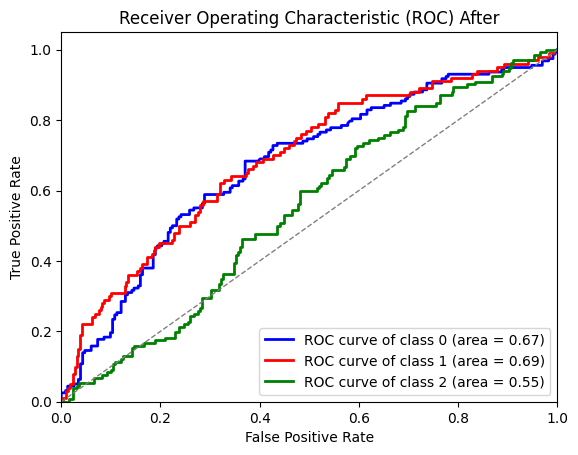

In [ ]:
valid_indices = ~np.isnan(y_pred_prob).any(axis=1)
y_test_valid = y_test[valid_indices]
y_pred_prob_valid = y_pred_prob1[valid_indices]

from sklearn.preprocessing import label_binarize
from itertools import cycle

# Check if y_test_valid is empty
if len(y_test_valid) == 0:
    print("Error: y_test_valid is empty. Check the data preprocessing steps.")
else:
    # Binarize the labels for each class separately
    y_test_bin = label_binarize(y_test_valid, classes=np.unique(y_test_valid))

    # Calculate ROC curve for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(y_train))):
        # Binarize the labels for the current class
        y_true_binary = y_test_bin[:, i]
        fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_pred_prob_valid[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Add more colors if needed
    for i, color in zip(range(len(np.unique(y_train))), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) After')
    plt.legend(loc="lower right")
    plt.show()


Plotting Heatmaps



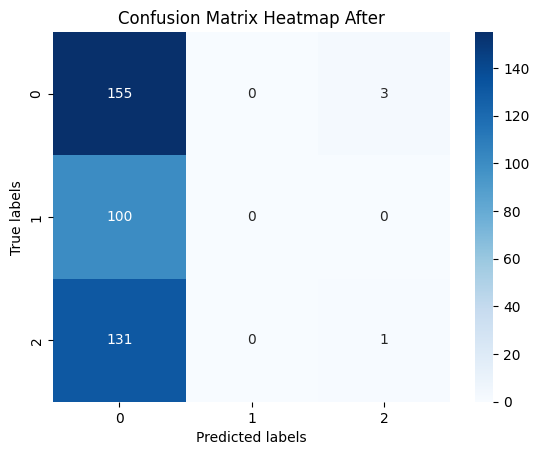

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap After')
plt.show()